In [2]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

## 2. Leyendo los datos

In [4]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,2,168,76.0,120,80,1,1,1,0,1,0
69972,22601,1,158,126.0,140,90,2,2,0,0,1,1
69973,19066,2,183,105.0,180,90,3,1,0,1,0,1
69974,22431,1,163,72.0,135,80,1,2,0,0,0,1


#### 2.1 Verificando si hay un desbalance en la columna cardio

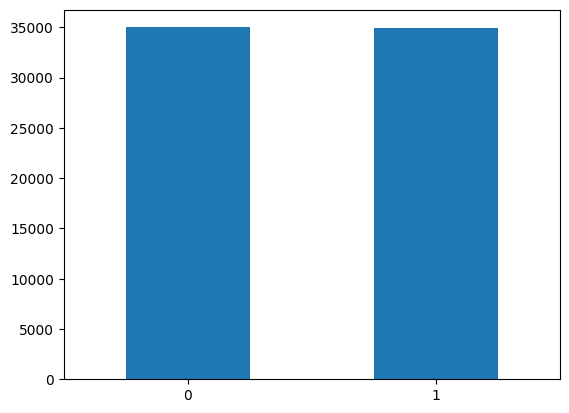

In [19]:
contar_cardio = dataset.cardio.value_counts(sort=True)
contar_cardio.plot(kind='bar', rot=0)
plt.show()

## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [6]:
X = dataset.drop(columns=['cardio'], axis=1)
y = dataset['cardio']

## 4. Realizando el escalamiento robusto de las variables predictoras

In [7]:
esc_rob = RobustScaler()
X_esc = esc_rob.fit_transform(X=X)

## 5. Separando los datos en train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Regresión logística

#### 6.1. Creando el algoritmo y entrenandolo

In [9]:
rg = LogisticRegression()
rg.fit(X=X_train, y=y_train)

LogisticRegression()

#### 6.2. Evaluando las predicciones del modelo con los datos de entrenamiento

Presición del modelo con los datos entrenamiento: 71.91 %


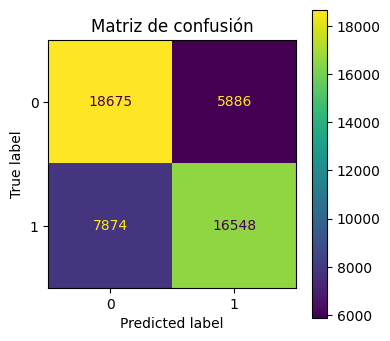

In [10]:
y_pred = rg.predict(X=X_train)
print('Presición del modelo con los datos entrenamiento: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 6.3. Evaluando las predicciones del modelo con los datos de test

Presición del modelo con los datos de prueba: 71.35 %


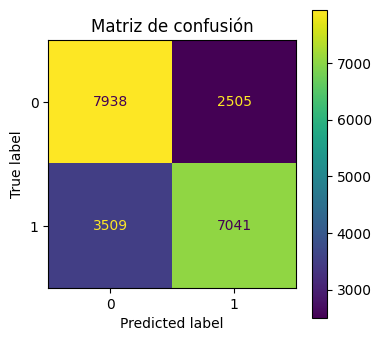

In [11]:
y_pred = rg.predict(X=X_test)
print('Presición del modelo con los datos de prueba: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

## 7. Optimización paramétrica

In [12]:
#Creando la grilla de parámetros
parametros = {
    'penalty':['l1','l2','elasticnet'],
    'C':np.linspace(0.1,10,100)
}

#Se crea el optimizador
rand_est = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=parametros, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy'
)

#Entrenando el modelo por optimización
rand_est.fit(X=X_train, y=y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='accuracy')

#### 7.1. Evaluando las predicciones del nuevo modelo con los datos de entrenamiento

Presición del modelo: 71.91 %


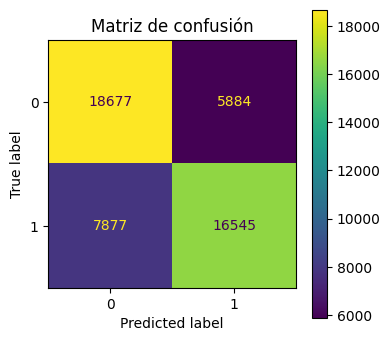

In [13]:
y_pred = rand_est.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 7.2. Evaluando las predicciones del nuevo modelo con los datos de prueba

Presición del modelo: 71.36 %


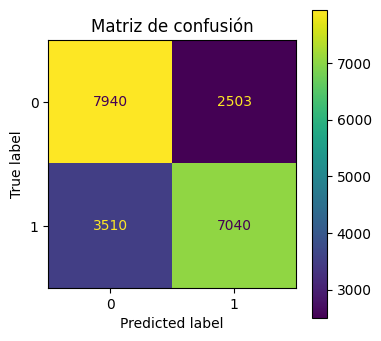

In [14]:
y_pred = rand_est.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()